In [1]:
import sympy as sp
import numpy as np
import keras
X=np.loadtxt('/home/dak3t/Project Stuff/train.csv', delimiter = ',')
X=X.astype('float32')
Y=np.loadtxt('/home/dak3t/Project Stuff/test.csv', delimiter = ',')
Y=Y.astype('float32')

Using TensorFlow backend.


In [2]:
print(X.shape)
print(Y.shape)

(5339, 81)
(5339, 81)


In [3]:
x_train = np.zeros((X.shape[0],9,9,1))
for i in range(X.shape[0]):
    x_train[i,:,:,0] = X[i].reshape(9,9)
y_train = Y

In [4]:
display(x_train.shape)
display(y_train.shape)

(5339, 9, 9, 1)

(5339, 81)

In [5]:
display(sp.Matrix(x_train[8,:,:,0]))
display(sp.Matrix(y_train[8].reshape(9,9)))
x_train.shape

Matrix([
[0.200000002980232, 0.300000011920929,               1.0, 0.100000001490116, 0.100000001490116, 0.100000001490116, 0.100000001490116,               0.0, 0.0],
[              1.0,               1.0, 0.200000002980232, 0.100000001490116, 0.100000001490116,               1.0, 0.100000001490116,               0.0, 0.0],
[              1.0,               1.0,               1.0,               1.0,               1.0,               1.0, 0.200000002980232, 0.100000001490116, 0.0],
[              1.0,               1.0,               1.0,               1.0,               1.0,               1.0,               1.0, 0.200000002980232, 0.0],
[              1.0,               1.0,               1.0,               1.0,               1.0,               1.0,               1.0, 0.200000002980232, 0.0],
[              1.0,               1.0,               1.0, 0.200000002980232, 0.100000001490116, 0.200000002980232, 0.100000001490116, 0.100000001490116, 0.0],
[              1.0,               1.0

Matrix([
[0.2, 0.3, 1.0, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0],
[1.0, 1.0, 0.2, 0.1, 0.1, 1.0, 0.1, 0.0, 0.0],
[0.2, 0.2, 0.1, 0.0, 0.1, 0.2, 0.2, 0.1, 0.0],
[0.0, 0.0, 0.0, 0.1, 0.1, 0.3, 1.0, 0.2, 0.0],
[0.0, 0.1, 0.1, 0.2, 1.0, 0.3, 1.0, 0.2, 0.0],
[0.0, 0.1, 1.0, 0.2, 0.1, 0.2, 0.1, 0.1, 0.0],
[0.1, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
[1.0, 0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.2, 1.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

(5339, 9, 9, 1)

In [27]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(18, kernel_size=(6,6),
                              activation = 'relu',
                              data_format='channels_last',
                              input_shape=[x_train.shape[1],
                                          x_train.shape[2],
                                          x_train.shape[3]]))
model.add(keras.layers.Conv2D(3,(3,3),activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(162,activation='relu'))
model.add(keras.layers.Dense(81, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 4, 4, 18)          666       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 3)           489       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 162)               2106      
_________________________________________________________________
dense_4 (Dense)              (None, 81)                13203     
Total params: 16,464
Trainable params: 16,464
Non-trainable params: 0
_________________________________________________________________


In [28]:
display(model.weights[0][0])

<tf.Tensor: shape=(6, 1, 18), dtype=float32, numpy=
array([[[ 0.07690835, -0.08173347, -0.01413443, -0.01146138,
          0.00490993,  0.07026055, -0.02295802,  0.04324697,
          0.03462483,  0.07721874, -0.01559499, -0.00540882,
          0.09149767, -0.01983382,  0.01115332,  0.03349648,
          0.05177136, -0.02952602]],

       [[ 0.08271959, -0.02246732,  0.09103486,  0.07581772,
         -0.0589156 , -0.09166664, -0.02830093, -0.07692798,
          0.00107262, -0.0265966 , -0.08799879,  0.02853682,
         -0.05731302,  0.05346425,  0.05793962,  0.00550018,
          0.06314132,  0.05057423]],

       [[-0.00480324,  0.04922304, -0.06579311, -0.05960997,
          0.01091796, -0.0328557 ,  0.06219268, -0.03464312,
         -0.0630834 ,  0.04860231,  0.07309359,  0.00714733,
         -0.02575775, -0.06032826, -0.04197286,  0.09246597,
         -0.01036487, -0.08867422]],

       [[-0.01236867,  0.00151125,  0.07749   ,  0.02749337,
          0.0321825 , -0.02480437, -0.040

In [29]:
model.load_weights("model.h5")

In [30]:
display(model.weights[0][0])

<tf.Tensor: shape=(6, 1, 18), dtype=float32, numpy=
array([[[ 1.6972598e-01,  4.6518001e-01,  5.9983045e-01,  2.2380008e-01,
         -5.3592557e-01,  9.0033673e-02, -5.2945480e-02,  5.2319515e-01,
         -3.1863919e-01, -2.4596849e-03, -4.0892074e-01,  4.9101058e-01,
         -1.8786458e+00,  1.6817827e-02,  2.7433115e-03,  8.0239034e-01,
          1.9740653e-01,  1.1309144e-02]],

       [[ 2.1067220e-01, -9.9863991e-02, -5.4350132e-01, -3.6389685e-01,
         -3.5099411e+00,  1.9736630e-01,  1.1770159e-01,  9.5811307e-02,
         -3.2783854e-01, -4.2383385e-01, -2.6463878e-01,  3.3036193e-01,
         -3.2155209e+00, -5.4569550e-02, -1.6167404e-02, -5.9319623e-02,
          2.2888835e-01, -1.5885971e-01]],

       [[-2.6679039e-01,  5.3471434e-01,  1.8459475e-01,  1.2161206e-01,
         -1.0143650e+00, -7.8326158e-02,  3.6125716e-02,  2.8161871e-01,
         -2.8232658e-01, -4.0808178e-02, -1.7233568e-01, -1.4434052e-01,
         -7.5966157e-02,  1.7788728e-01,  5.9277308e-03, 

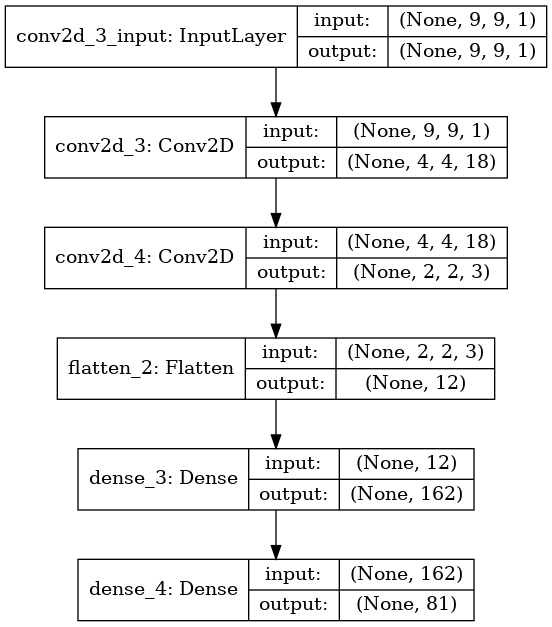

In [31]:
from keras.utils.vis_utils import plot_model
# Visualization - wish we could see the recurrent weights!
plot_model(model,to_file='encdec.png',show_shapes=True,expand_nested=True)

In [14]:
batch_size = 4
epochs = 300
history = model.fit(x_train,y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1)

Epoch 1/300
5339/5339 [==============================] - 3s 501us/step - loss: 0.2645 - accuracy: 0.4666
Epoch 2/300
5339/5339 [==============================] - 2s 465us/step - loss: 0.2644 - accuracy: 0.4665
Epoch 3/300
5339/5339 [==============================] - 2s 464us/step - loss: 0.2645 - accuracy: 0.4666
Epoch 4/300
5339/5339 [==============================] - 3s 470us/step - loss: 0.2644 - accuracy: 0.4666
Epoch 5/300
5339/5339 [==============================] - 3s 470us/step - loss: 0.2644 - accuracy: 0.4666
Epoch 6/300
5339/5339 [==============================] - 3s 469us/step - loss: 0.2644 - accuracy: 0.4665
Epoch 7/300
5339/5339 [==============================] - 2s 463us/step - loss: 0.2645 - accuracy: 0.4666
Epoch 8/300
5339/5339 [==============================] - 2s 460us/step - loss: 0.2644 - accuracy: 0.4666
Epoch 9/300
5339/5339 [==============================] - 2s 463us/step - loss: 0.2645 - accuracy: 0.4665
Epoch 10/300
5339/5339 [==============================]

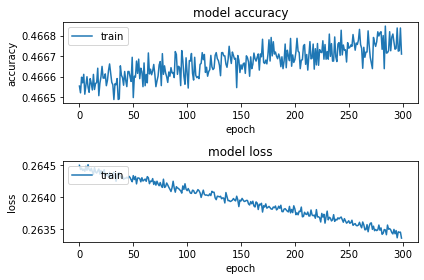

In [15]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')

plt.tight_layout()
plt.show()

In [32]:
score = model.evaluate(x_train, Y, verbose=1)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

5339/5339 [==============================] - 0s 54us/step
Test loss:  0.2663592856895792
Test accuracy:  0.46650430560112


In [35]:
preds = model.predict(x_train[:,:,:,:]).astype("float32")
preds = preds.round(decimals=1)
display(sp.Matrix(preds[42].reshape(9,9)))
display(sp.Matrix(y_train[42].reshape(9,9)))

Matrix([
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 1.0, 0.1],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.3],
[0.0, 0.0, 0.2, 0.1, 0.1, 0.1, 0.8, 0.1, 0.0],
[0.0, 0.0, 0.1, 0.9, 0.2, 0.1, 0.1, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.1, 0.1, 0.0],
[0.1, 0.2, 0.2, 0.0, 0.1, 0.8, 0.2, 0.1, 0.1],
[0.3, 0.9, 0.2, 0.2, 0.4, 0.8, 0.3, 1.0, 0.3],
[1.0, 0.2, 0.9, 0.3, 0.3, 0.4, 0.5, 0.1, 0.2],
[0.2, 0.3, 0.0, 0.1, 0.1, 0.9, 0.1, 0.0, 0.0]])

Matrix([
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 1.0, 0.1],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.2, 0.1],
[0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 1.0, 0.1, 0.0],
[0.0, 0.0, 0.1, 1.0, 0.1, 0.1, 0.1, 0.1, 0.0],
[0.0, 0.0, 0.1, 0.1, 0.2, 0.1, 0.1, 0.0, 0.0],
[0.1, 0.1, 0.1, 0.0, 0.2, 1.0, 0.3, 0.1, 0.1],
[0.2, 1.0, 0.2, 0.1, 0.2, 1.0, 0.3, 1.0, 0.1],
[1.0, 0.3, 1.0, 0.1, 0.2, 0.2, 0.3, 0.1, 0.1],
[0.1, 0.2, 0.1, 0.1, 0.1, 1.0, 0.1, 0.0, 0.0]])